In [1]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

In [2]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [3]:
# Create training dataset and validation dataset

train_data = Data()
val_data = Data(train = False)

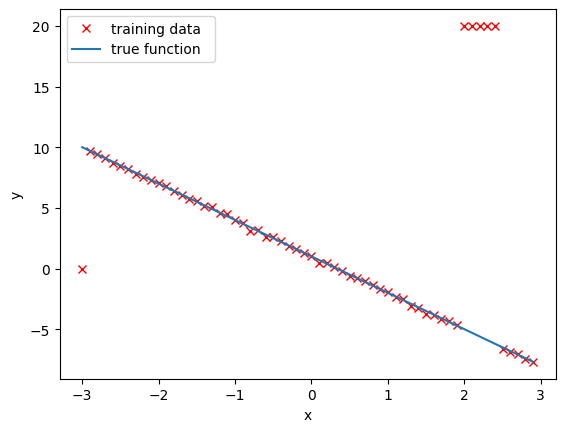

In [4]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
# Create Linear Regression Class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [6]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

In [7]:
learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]

In [13]:
# Define the train model function and train the model

def train_model_with_lr (iter, lr_list):
    
    # iterate through different learning rates 
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
    
        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

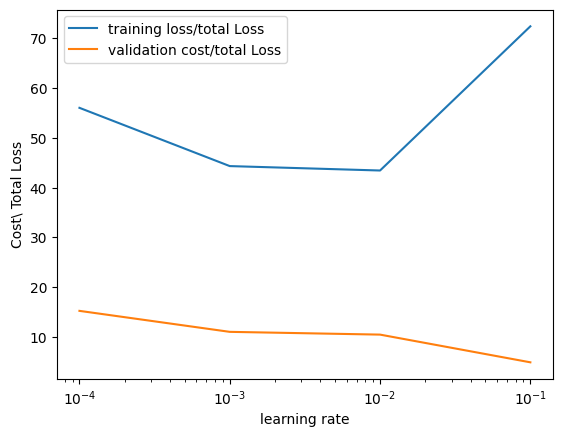

In [14]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

0 [[0.46522373]
 [0.4883697 ]
 [0.51151574]]
1 [[5.4695773]
 [5.3534603]
 [5.237344 ]]
2 [[6.611724 ]
 [6.4767666]
 [6.3418093]]
3 [[14.158403]
 [13.733998]
 [13.309591]]


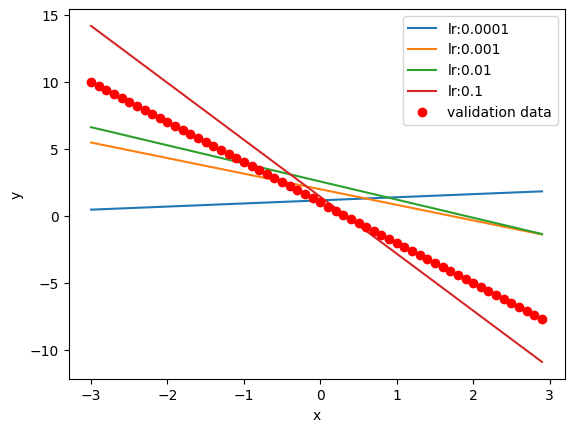

In [12]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print(i, yhat.detach().numpy()[0:3])
    i+=1
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [15]:
good_model = MODELS[np.argmin(validation_error)]

for x, y in trainloader:
    print("yhat= ", model(x),"y", y)

yhat=  tensor([[14.1584]], grad_fn=<AddmmBackward0>) y tensor([[0.]])
yhat=  tensor([[13.7340]], grad_fn=<AddmmBackward0>) y tensor([[9.7027]])
yhat=  tensor([[13.3096]], grad_fn=<AddmmBackward0>) y tensor([[9.4079]])
yhat=  tensor([[12.8852]], grad_fn=<AddmmBackward0>) y tensor([[9.1000]])
yhat=  tensor([[12.4608]], grad_fn=<AddmmBackward0>) y tensor([[8.7351]])
yhat=  tensor([[12.0364]], grad_fn=<AddmmBackward0>) y tensor([[8.4531]])
yhat=  tensor([[11.6120]], grad_fn=<AddmmBackward0>) y tensor([[8.2373]])
yhat=  tensor([[11.1876]], grad_fn=<AddmmBackward0>) y tensor([[7.8088]])
yhat=  tensor([[10.7632]], grad_fn=<AddmmBackward0>) y tensor([[7.5282]])
yhat=  tensor([[10.3388]], grad_fn=<AddmmBackward0>) y tensor([[7.3008]])
yhat=  tensor([[9.9143]], grad_fn=<AddmmBackward0>) y tensor([[7.0240]])
yhat=  tensor([[9.4899]], grad_fn=<AddmmBackward0>) y tensor([[6.8199]])
yhat=  tensor([[9.0655]], grad_fn=<AddmmBackward0>) y tensor([[6.3875]])
yhat=  tensor([[8.6411]], grad_fn=<AddmmBackw